In [4]:
from tensorflow.keras.layers import *
import pandas as pd
import numpy as np
from tensorflow.keras.models import *
from keras.optimizers import Adam
import sys
import os
from random import *
sys.path.append(os.path.abspath('/kaggle/input/pavits-new'))
import newest_pavit
#import PaViTs
import cv2
import tensorflow as tf
from keras.callbacks import *
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
import matplotlib.pyplot as plt
from keras.activations import *
from tensorflow.keras.metrics import *
from keras.preprocessing.image import *
import tensorflow as tf
from tensorflow.image import extract_patches

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.extract_patches (TFOp  (None, 7, 7, 3072)  0           ['Input[0][0]']                  
 Lambda)                                                                                          
                                                                                                  
 reshape (Reshape)              (None, 49, 3072)     0           ['tf.image.extract_patches[0][0]'
                                                                 ]                          

In [4]:
!pip install pydot_ng

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
try:
  import opendatasets
  
except:
  !pip install opendatasets
  import opendatasets
opendatasets.download('https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset')



/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [6]:
#|img=plt.imread('C:\\Users\\Emmanuel\\Music\\download.png')
#img=cv2.resize(img, (224, 224))
num_patches=224//32

In [7]:
traingen=ImageDataGenerator(rescale=1/224, height_shift_range=.2, 
                            horizontal_flip=True, vertical_flip=True,
                            rotation_range=.3)
train_data=traingen.flow_from_directory(directory='/kaggle/working/vegetable-image-dataset/Vegetable Images/train',
                                        target_size=(224, 224), batch_size=100,shuffle=True,class_mode='categorical', color_mode='rgb')


valgen=ImageDataGenerator(rescale=1/224, height_shift_range=.2, 
                            horizontal_flip=True, vertical_flip=True,
                            rotation_range=.3)
val_data=valgen.flow_from_directory(directory='/kaggle/working/vegetable-image-dataset/Vegetable Images/validation',
                                        target_size=(224, 224), batch_size=100,shuffle=True,class_mode='categorical', color_mode='rgb')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
#classes={i:j for i, v in range(1)}

<Figure size 640x480 with 0 Axes>

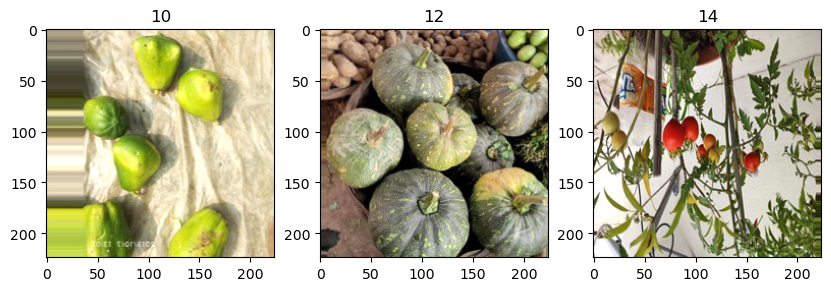

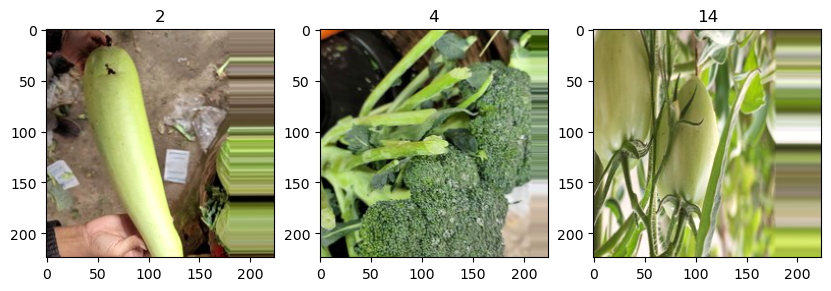

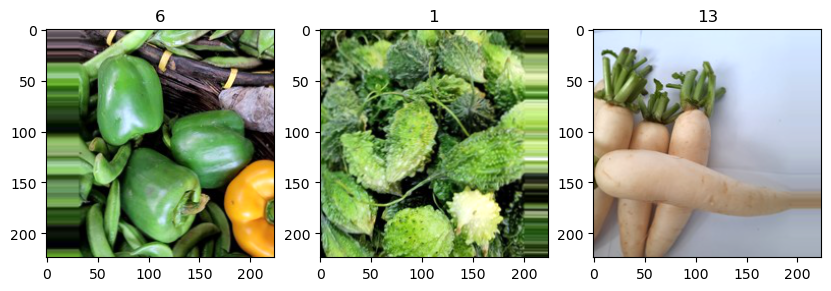

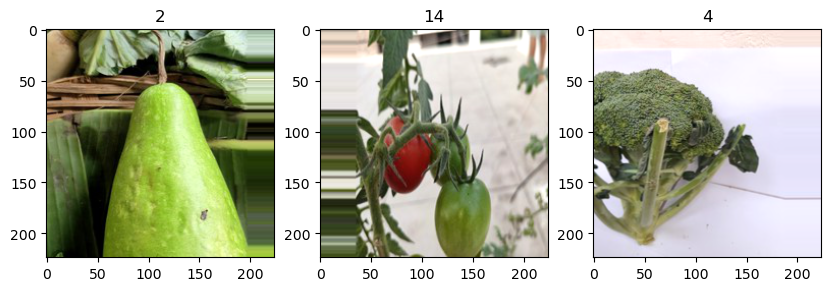

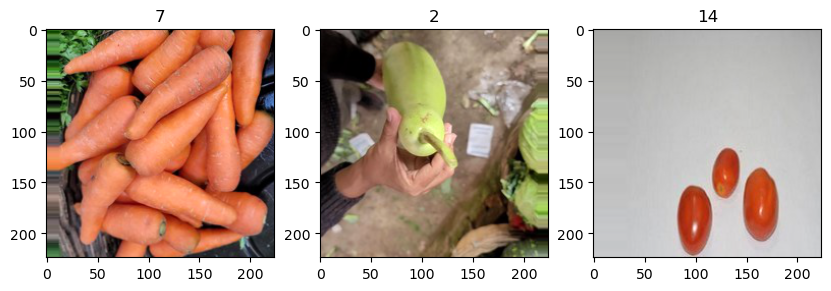

In [9]:
def show_Data(data, suptitle: str, fig_size:tuple=(10, 10)):
    plt.suptitle(suptitle)
    fig=plt.figure(figsize=fig_size)
    for i in range(3):
        x, y=next(iter(data))
        seeds=randint(0, 100-1)
        fig.add_subplot(1, 3, i+1)
        plt.imshow(x[seeds])
        plt.title(np.argmax(y[seeds], axis=-1))
        

        
for i in range(5):
    show_Data(train_data, suptitle=None)
        

In [10]:
model=newest_pavit.PaViT()
p_model=model.model(activation='softmax')
p_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.extract_patches_1 (TF  (None, 7, 7, 3072)  0           ['Input[0][0]']                  
 OpLambda)                                                                                        
                                                                                                  
 reshape_1 (Reshape)            (None, 49, 3072)     0           ['tf.image.extract_patches_1[0][0
                                                                 ]']                        

In [ ]:
p_model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy',Precision(), Recall() ])
es=EarlyStopping(mode='min', monitor='val_loss', patience=5, restore_best_weights=True)
rl=ReduceLROnPlateau(mode='min', monitor='val_loss',patience=3, min_lr=1e-8)
cp=ModelCheckpoint('PAVIT_weight.h5', monitor='val_loss', save_best_only=True)
history=p_model.fit(train_data, epochs=50, batch_size=1, callbacks=[rl, es, cp], validation_data=val_data)

Epoch 1/50
150/150 [==============================] - 220s 1s/step - loss: 1.9740 - accuracy: 0.4187 - precision: 0.5545 - recall: 0.3019 - val_loss: 4.4774 - val_accuracy: 0.2240 - val_precision: 0.2319 - val_recall: 0.2033 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 215s 1s/step - loss: 1.0971 - accuracy: 0.6607 - precision: 0.7534 - recall: 0.5697 - val_loss: 5.6856 - val_accuracy: 0.3097 - val_precision: 0.3270 - val_recall: 0.3007 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 214s 1s/step - loss: 0.8105 - accuracy: 0.7516 - precision: 0.8090 - recall: 0.6937 - val_loss: 2.3192 - val_accuracy: 0.4897 - val_precision: 0.5239 - val_recall: 0.4633 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 212s 1s/step - loss: 0.7089 - accuracy: 0.7861 - precision: 0.8295 - recall: 0.7403 - val_loss: 1.2988 - val_accuracy: 0.6763 - val_precision: 0.7142 - val_recall: 0.6463 - lr: 0.0010
Epoch 5/50
150/150 [============================

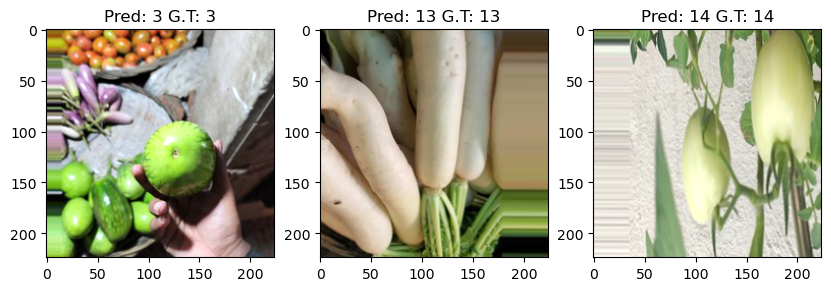

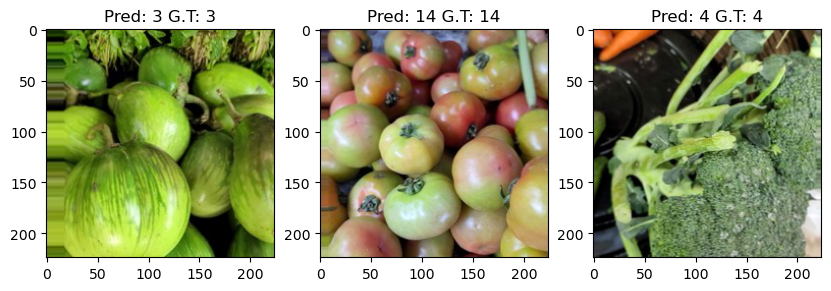

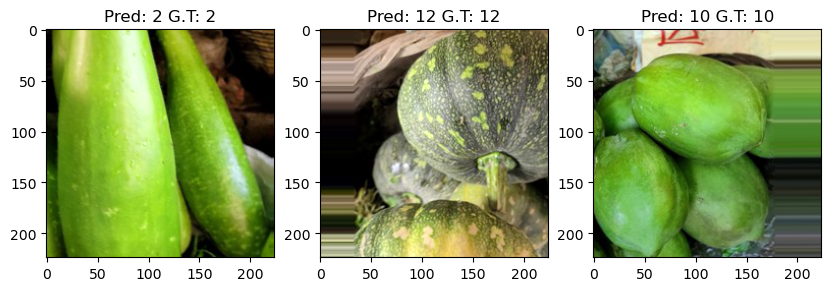

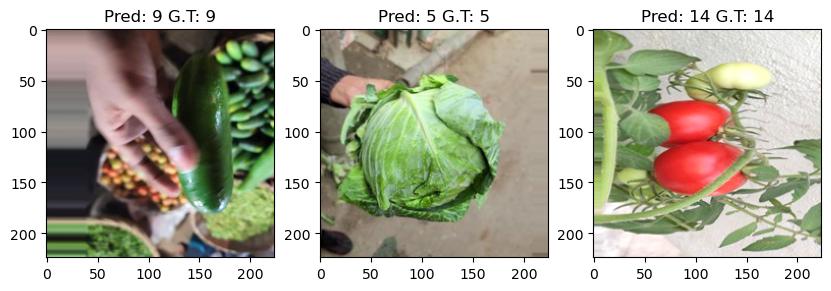

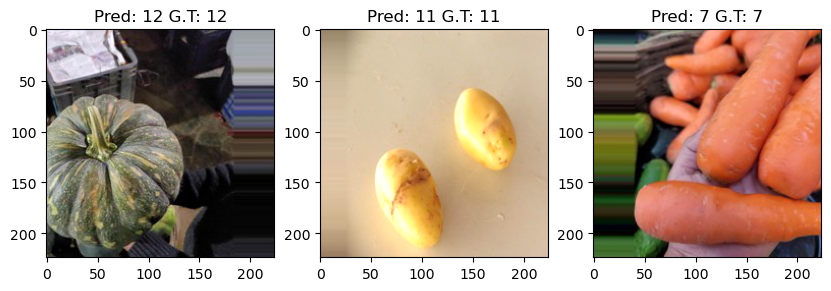

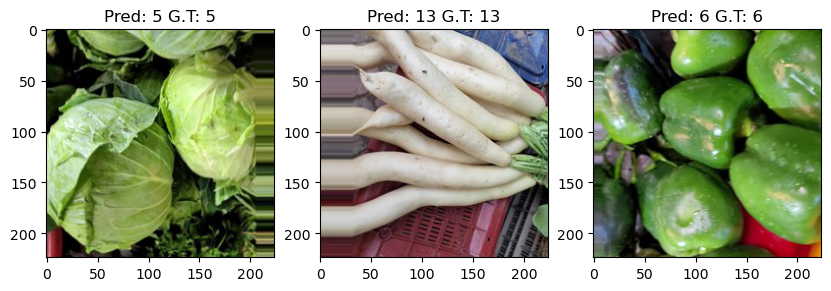

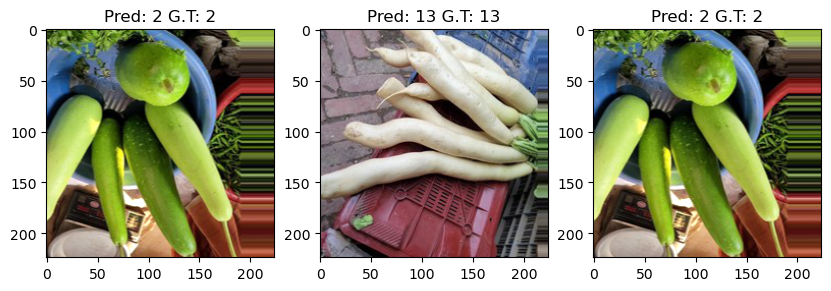

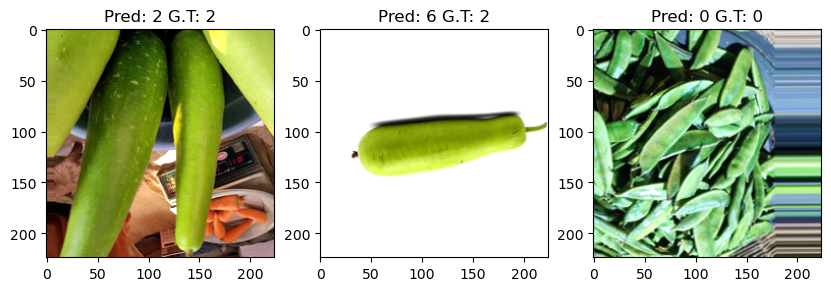

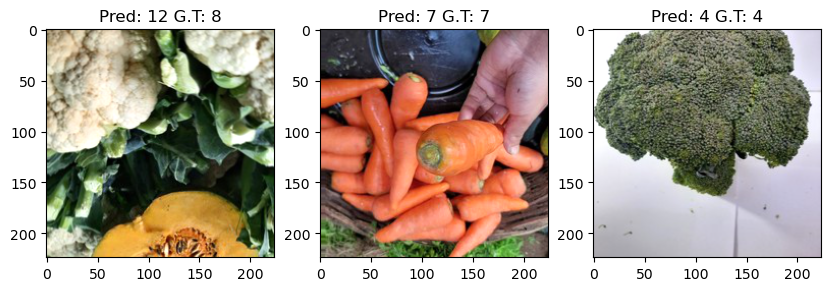

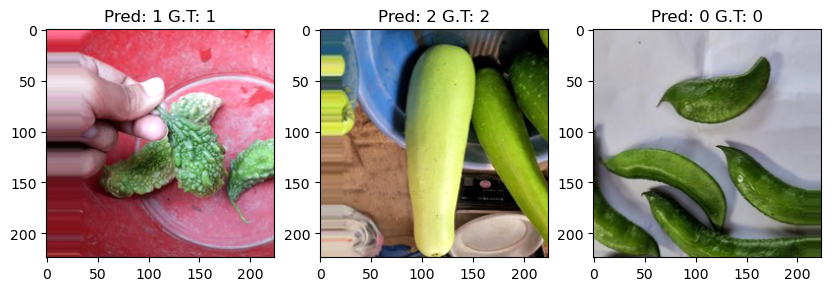

In [71]:
def show(test):
    
    x, y= next(iter(test))
    fig=plt.figure(figsize=(10, 10))
    for i in range(3):
        fig.add_subplot(1,3,i+1)
        n=randint(0, 99)
        plt.imshow(x[n])
        pred=p_model(np.expand_dims(x[n], axis=0))
        pred=np.argmax(pred, axis=-1)
        plt.title(f'Pred: {int(pred)} G.T: {np.argmax(y[n], axis=-1)}')

for i in range(10):
    show(test_data)